In [324]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,PowerTransformer,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,root_mean_squared_error

In [63]:
df = pd.read_csv('./insurance.csv')

In [64]:
# Basic analysis of the data
df.shape

(1338, 7)

In [65]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


In [66]:
# describe data
df.describe()

,age,bmi,children
count,1272.000000,1272.000000,1272.000000
mean,35.214623,30.560550,0.948899
std,22.478251,6.095573,1.303532
min,-64.000000,15.960000,-4.000000
25%,24.750000,26.180000,0.000000
50%,38.000000,30.210000,1.000000
75%,51.000000,34.485000,2.000000
max,64.000000,53.130000,5.000000


- -64 age and -4 children,may be mistake in sign
- 

In [68]:
df.duplicated().sum()

1

In [69]:
# Check missing values
df.isnull().sum()

age         66
sex         66
bmi         66
children    66
smoker      66
region      66
charges     54
dtype: int64

In [70]:
df[df.age.isnull()]

,age,sex,bmi,children,smoker,region,charges
32,NaN,NaN,28.600,NaN,NaN,Southwest,$nan
44,NaN,male,NaN,NaN,no,NaN,NaN
49,NaN,NaN,NaN,1.0,NaN,NaN,NaN
58,NaN,NaN,22.880,NaN,yes,NaN,23244.7902
63,NaN,female,25.935,1.0,NaN,Northwest,4133.64165
...,...,...,...,...,...,...,...
1253,NaN,NaN,NaN,NaN,NaN,Southwest,NaN
1296,NaN,NaN,26.125,0.0,NaN,northeast,1708.92575
1309,NaN,male,NaN,NaN,no,Southwest,NaN
1312,NaN,M,NaN,1.0,NaN,Southwest,4536.259


In [71]:
# drop all missing values
df.dropna(thresh=7,inplace=True)

In [72]:
# Data Cleaning

In [73]:
# fixing Nagative values in age feature
df.loc[df['age']<0,'age'] = df.loc[df['age']<0,'age']*-1

In [74]:
# Checking any age with nagative values
df.query('age<0')

,age,sex,bmi,children,smoker,region,charges


In [75]:
# Changing sex into binary values
df['sex'] = df['sex'].str.match('m',case=False).astype(int)

In [76]:
df['sex'].value_counts()

sex
1    613
0    595
Name: count, dtype: int64

<Axes: >

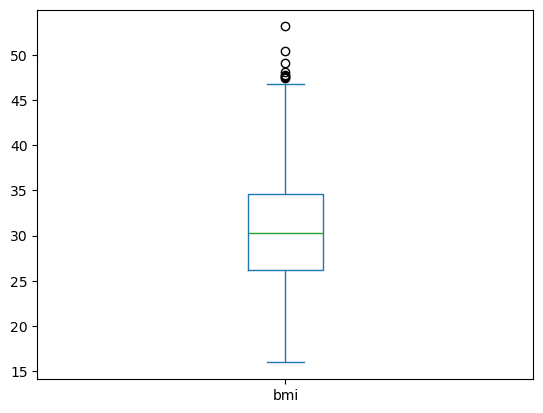

In [77]:
df['bmi'].plot(kind='box')

In [78]:
# Change the nagative values in the children
df.loc[df['children']<0,'children'] = df.loc[df['children']<0,'children']*-1

In [79]:
# Convert to integer
df['children'] = df['children'].astype(int)

In [80]:
# convert smoker feature in binary
df['smoker'] = df['smoker'].eq('yes').astype(int)

In [81]:
df['region'].value_counts()

region
Southeast    164
southeast    158
southwest    157
Northwest    149
Northeast    149
northeast    146
northwest    145
Southwest    140
Name: count, dtype: int64

In [82]:
# There are duplicates with diffrent case
df['region'] = df['region'].str.lower()

In [83]:
df['region'].value_counts()

region
southeast    322
southwest    297
northeast    295
northwest    294
Name: count, dtype: int64

In [84]:
# there are many row with $nan value and $number values , we should extract the numbers
df['charges'] = df['charges'].str.extract(r'(\d+.*\d*)',expand=False)

In [85]:
df['charges'] = df['charges'].astype(float)

In [86]:
df.dropna(inplace=True)

In [87]:
# Before Analysing the data we should create a validation dataset from this


In [88]:
# train test split
train_data, val_data = train_test_split(df,test_size=.2,stratify=df['sex'])

In [89]:
# EDA 

In [90]:
# univariate analysis

In [91]:
def cont_num_plot(feature,color='teal'):
    fig,ax = plt.subplots(3,1,figsize=(10,6))
    sns.histplot(df,x=feature,bins=50,ax=ax[0],color=color)
    sns.kdeplot(df,x=feature,ax=ax[1],color=color,fill=True)
    sns.boxplot(df,x=feature,ax=ax[2],color=color)
    fig.suptitle(feature.upper()+' Distribution Plots',fontdict={'size':20,'fontfamily':'serif'},y=1.0)
    plt.tight_layout()
    plt.show()

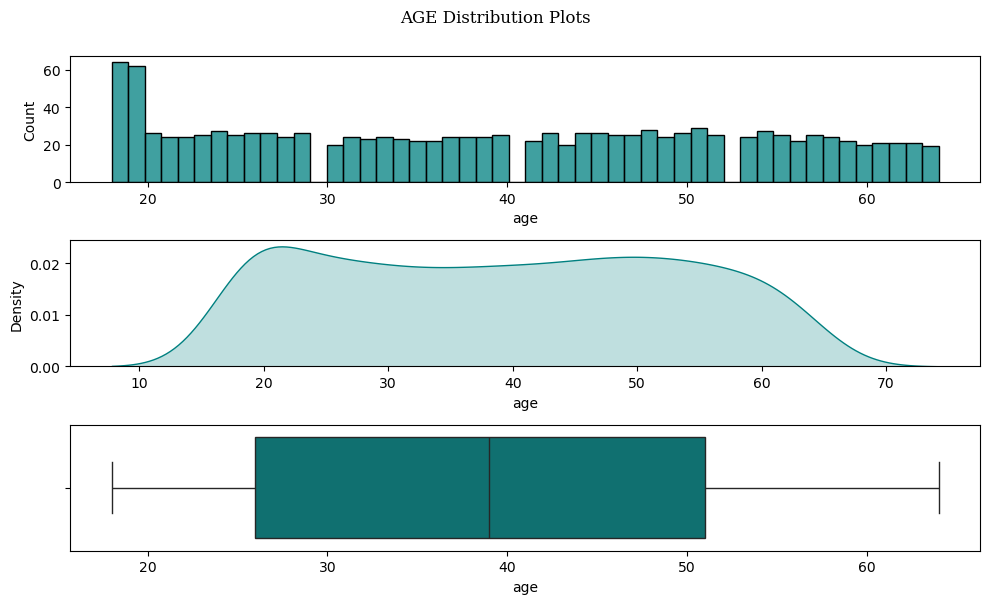

In [92]:
# Plot age feature
cont_num_plot('age')

In [93]:
def bin_cat_plot(feature,labels=['Male','Female']):
    fig, ax = plt.subplots(1,2,figsize=(10,4))
    sns.countplot(data=df,x=feature,ax=ax[0],palette=['teal','tan'])
    ax[1].pie(df[feature].value_counts(),autopct='%1.1f%%',labels=labels,colors=['tan','teal'])
    fig.suptitle(feature.upper()+' Distribution Plots',fontdict={'size':20,'fontfamily':'serif'},y=1.0,x=.6)
    fig.legend()
    plt.show()

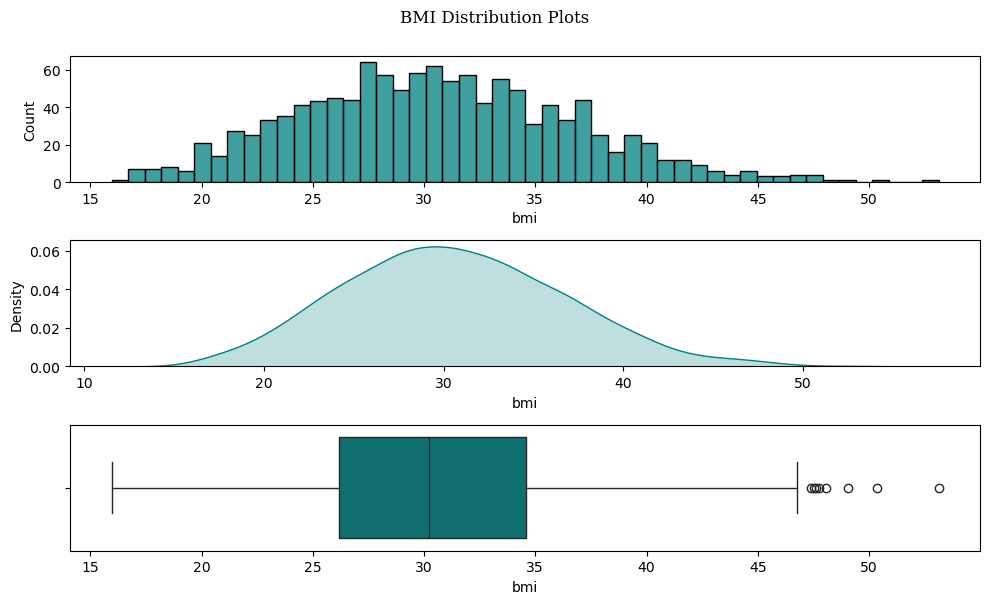

In [94]:
# Analysing the bmi feature
cont_num_plot('bmi')

there are some outliers in the bmi

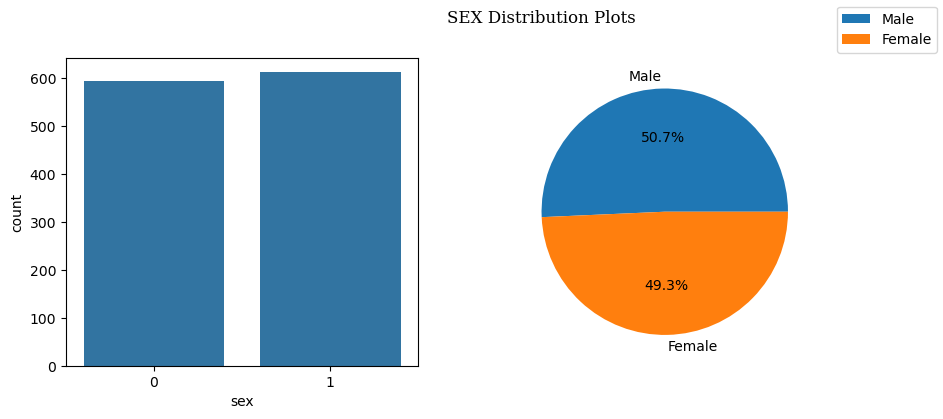

In [96]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.countplot(data=df,x='sex',ax=ax[0])
ax[1].pie(df['sex'].value_counts(),autopct='%1.1f%%',labels=['Male','Female'])
fig.suptitle('sex'.upper()+' Distribution Plots',fontdict={'size':20,'fontfamily':'serif'},y=1.0,x=.6)
fig.legend()
plt.show()

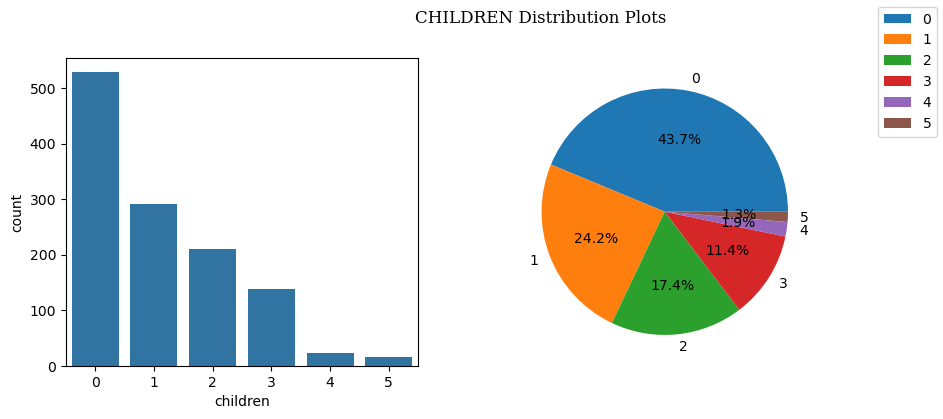

In [97]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.countplot(data=df,x='children',ax=ax[0])
ax[1].pie(df['children'].value_counts(),autopct='%1.1f%%',labels=[0,1,2,3,4,5])
fig.suptitle('children'.upper()+' Distribution Plots',fontdict={'size':20,'fontfamily':'serif'},y=1.0,x=.6)
fig.legend()
plt.show()

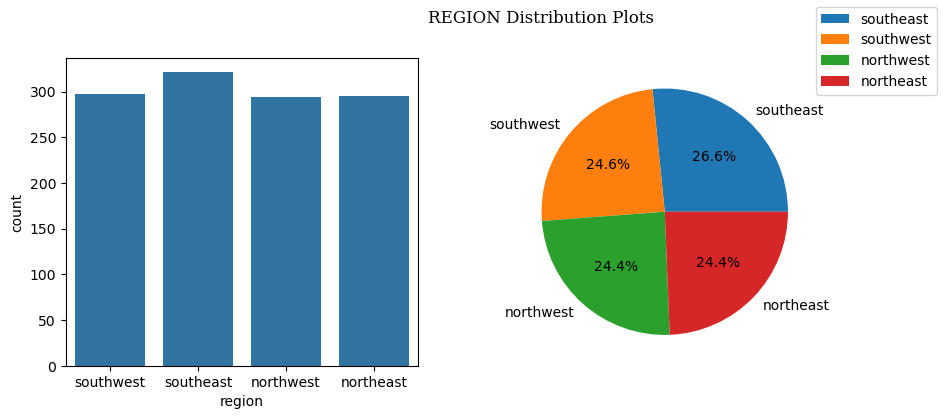

In [98]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.countplot(data=df,x='region',ax=ax[0])
ax[1].pie(df['region'].value_counts(),autopct='%1.1f%%',labels=['southeast','southwest','northwest','northeast',],)
fig.suptitle('region'.upper()+' Distribution Plots',fontdict={'size':20,'fontfamily':'serif'},y=1.0,x=.6)
fig.legend()
plt.show()

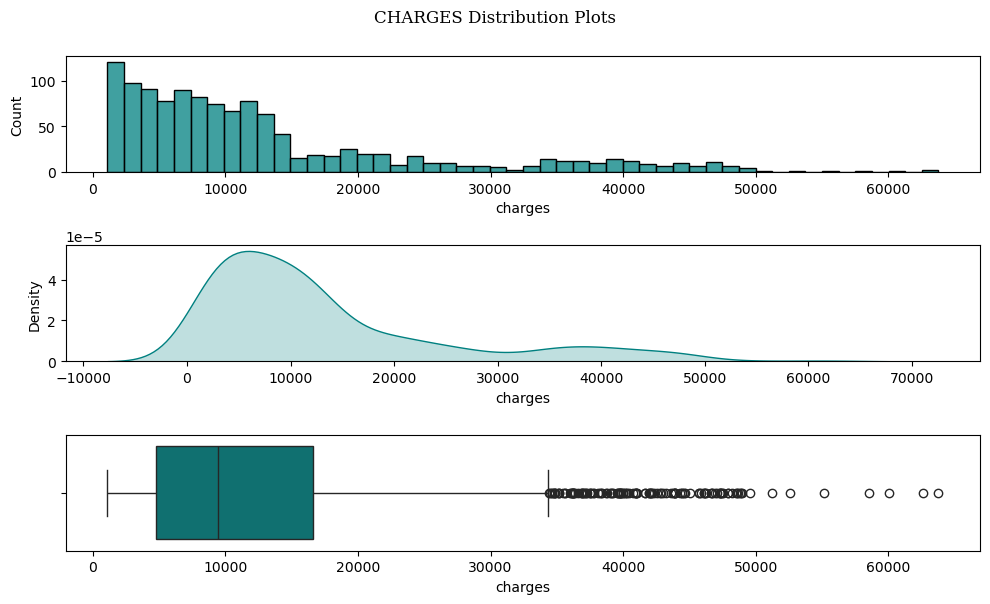

In [99]:
cont_num_plot('charges')

In [100]:
# Multivariate Analysis

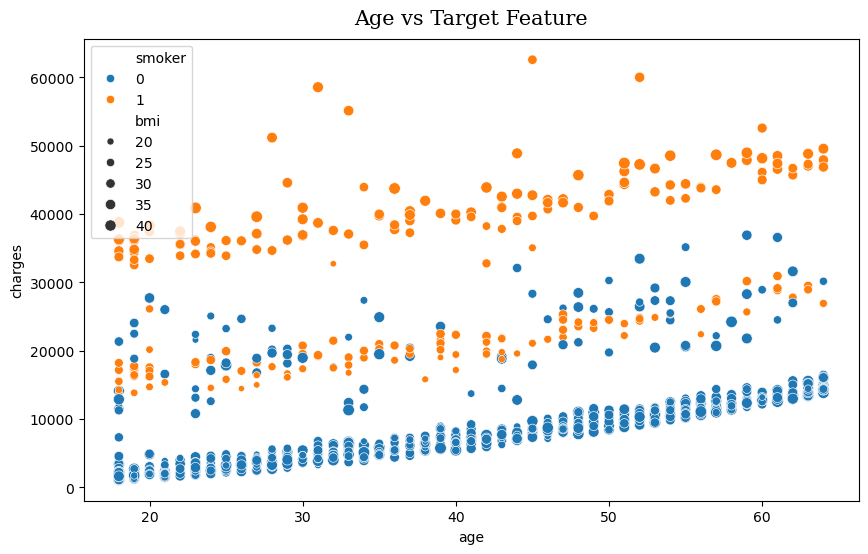

In [214]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(df,x='age',y='charges',color='teal',hue='smoker',size='bmi')
plt.title('Age vs Target Feature',fontdict={'fontfamily':'serif'},size=15,pad=10.5)
plt.show()

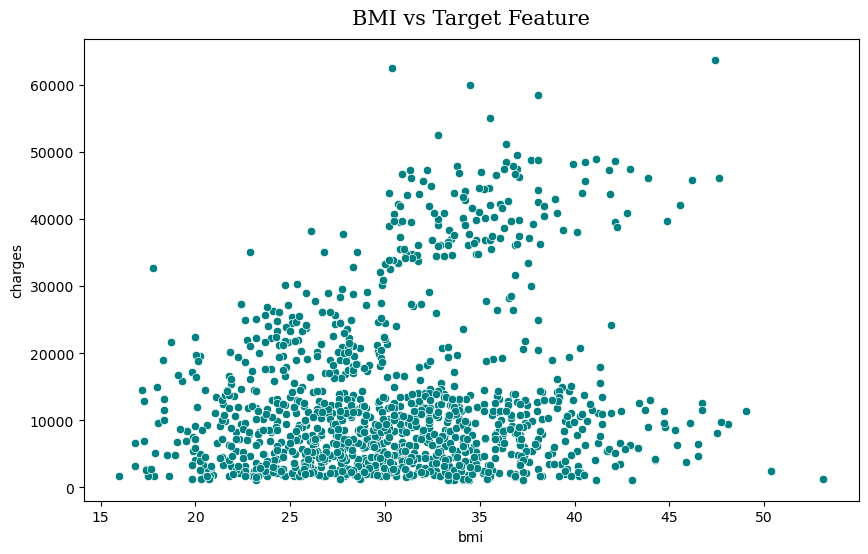

In [155]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(df,x='bmi',y='charges',color='teal')
plt.title('BMI vs Target Feature',fontdict={'fontfamily':'serif'},size=15,pad=10.5)
plt.show()

<Axes: >

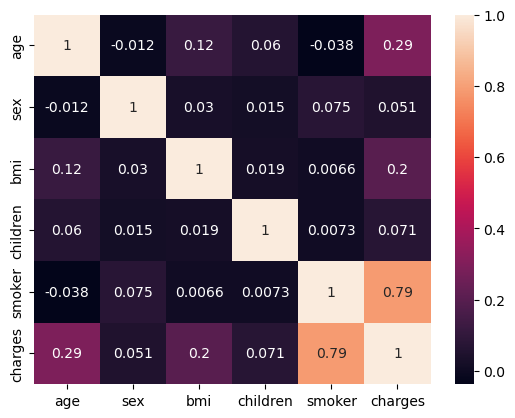

In [159]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

Text(0.5, 1.0, 'Smoking vs Charges')

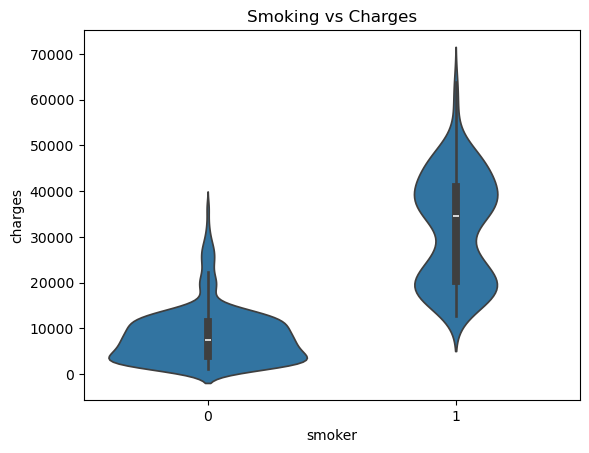

In [165]:
sns.violinplot(x=df['smoker'],y=df['charges'])
plt.title('Smoking vs Charges')

Text(0.5, 1.0, 'children vs Charges')

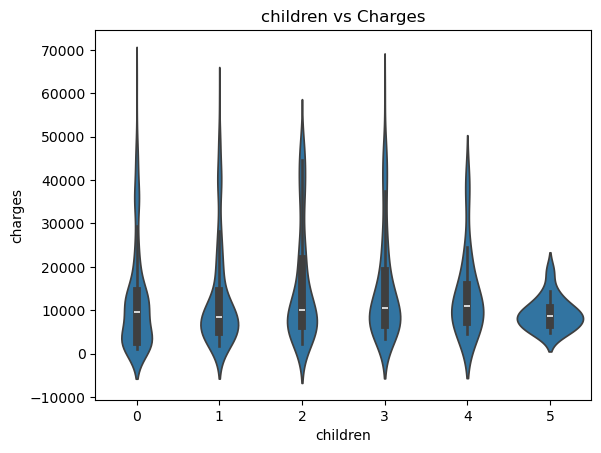

In [169]:
sns.violinplot(x=df['children'],y=df['charges'])
plt.title('children vs Charges')

Text(0.5, 1.0, 'children vs Charges')

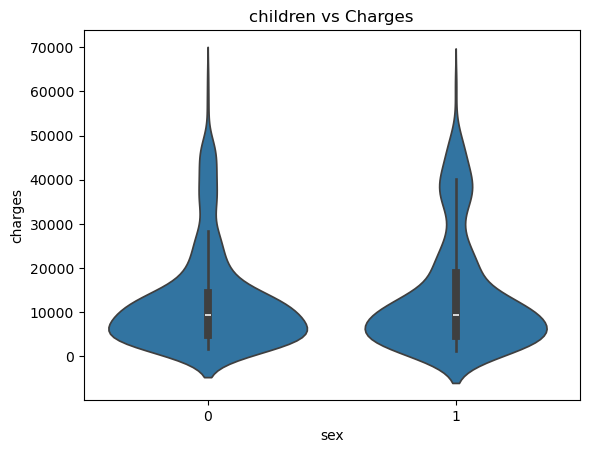

In [171]:
sns.violinplot(x=df['sex'],y=df['charges'])
plt.title('children vs Charges')

Text(0.5, 1.0, 'children vs Charges')

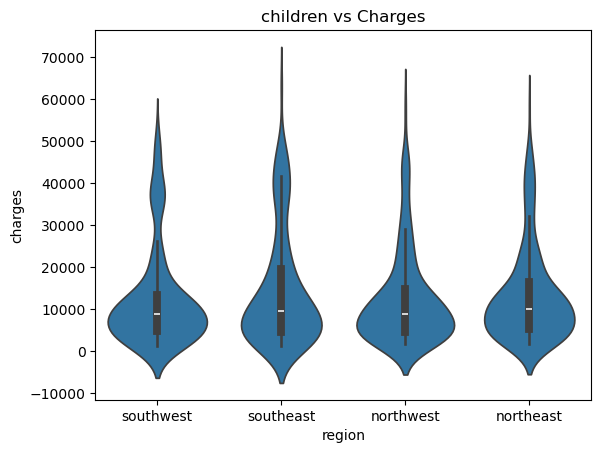

In [175]:
sns.violinplot(x=df['region'],y=df['charges'])
plt.title('children vs Charges')

In [254]:
y_train = train_data['charges']
X_train = train_data.drop('charges',axis=1)

In [210]:
# Removing some outliers in bmi
df.drop(df[df['bmi']>43.5].index,inplace=True)

In [281]:
# Modeling
trf_1= ColumnTransformer([
    ('Std_scalar',StandardScaler(),[0,2]),
    ('ohe',OneHotEncoder(drop='first',sparse_output=False),[5])
],remainder='passthrough').set_output(transform='pandas')

In [283]:
trf_2 = ColumnTransformer([
    ("pre",PowerTransformer(),[0])
],remainder='passthrough').set_output(transform='pandas')

In [285]:
pipe_model = Pipeline([
    ('step1',trf_1),
    ('step2',trf_2),
    ('model',TransformedTargetRegressor(regressor=RandomForestRegressor(),func=np.log,inverse_func=np.exp))
])

In [287]:
pipe_model

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Std_scalar',
                                                  StandardScaler(), [0, 2]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [5])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pre', PowerTransformer(),
                                                  [0])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor()))])

In [289]:
cross_val_score(estimator=pipe_model,X=X_train,y=y_train,scoring='r2',cv=3)

array([0.81741998, 0.81888122, 0.8620346 ])

In [295]:
pipe_model.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Std_scalar',
                                                  StandardScaler(), [0, 2]),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [5])])),
                ('step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pre', PowerTransformer(),
                                                  [0])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor()))])

In [307]:
y_test = val_data['charges']
X_test = val_data.drop('charges',axis=1)

In [314]:
y_pred = pipe_model.predict(val_data)

In [322]:
r2_score(y_test,y_pred)

0.8956576108341323

In [326]:
root_mean_squared_error(y_test,y_pred)

3801.7537748590385